# WeatherPy
----

##### Key Observations
1. There are more cities in the Northern Hemisphere (Antartica occupies a large portion of the southern hemisphere)
2. There is a definite correlation between maximum temperature and distance to the equator
3. Humidy, Wind Speed and Cloudiness do not appear to have the same correlation with latitude

_NOTE:  Output charts are named y versus x_ and saved to a folder **output_data**

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from datetime import datetime

import requests
import json
import os

from matplotlib.offsetbox import AnchoredText

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "../output_data/cities.csv"
#output_data_file = "citiesA.csv"

# Range of latitudes and longitudes
lat_range = (-180, 180)  #open up entire range
lng_range = (-180, 180)


## Generate Cities List
This is achieved using citipy to find the name of the nearest city based on latitude and longitude.  First a set of randm latitude and longitude values are generated.  Looping through those values identifies the nearest city using citipy and if the city is not already in the list of cities it is added. The result is a list of random city names. 

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000,  high=90.000,  size=2000)
lngs = np.random.uniform(low=-180.000, high=180.000, size=2000)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)  #cities is a list of city names

# Print the city count to confirm sufficient count
number_of_cities = len(cities)
print(f"This program will look at {number_of_cities} cities")

This program will look at 742 cities


### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it's being processed (with the city number and city name).


In [3]:
# set up dataframe column names
column_names = ['City','Cloudiness','Country',
                'Date','Humidity','Lat','Lng',
                'Max Temp','Wind Speed']

# Create an empty list to populate with weather data
weather = []

# Print a banner
print('Beginning Data Retrieval')
print("------------------------------")

# Loop over the list of cities and request data from openweather
for i in range(0, len(cities)):
    # Set up the url for the city to query
    url="http://api.openweathermap.org/data/2.5/weather?q="+cities[i]+"&units=imperial&appid=283a9319d8bc008a581bb0b88d702293"
    #print(url)
    
    try: 
        # Make the request call and jsonify it all in one step
        response = requests.get(url).json()
        # Print a progress report to the screen
        print("Processing Record \033[36m {0}\033[0m of Set \033[36m {1} \033[0m | {2}".format(i, number_of_cities, cities[i]))
        # append the call data to the weather list
        weather.append([response['name'], response['clouds']['all'], 
                    response['sys']['country'], 
                    response['dt'], response['main']['humidity'], response['coord']['lat'], 
                    response['coord']['lon'], response['main']['temp_max'], 
                    response['wind']['speed']])
    except:
        # If the city is not found just skip it and process the next city 
        print('City \033[1m not \033[0m found. Skipping...')

# Create a dataframe with the weather data
df = pd.DataFrame(weather, columns=column_names)
df


Beginning Data Retrieval
------------------------------
Processing Record  0 of Set  742  | san ramon de la nueva oran
Processing Record  1 of Set  742  | karakendzha
City  not  found. Skipping...
Processing Record  2 of Set  742  | albany
Processing Record  3 of Set  742  | flin flon
Processing Record  4 of Set  742  | marovoay
Processing Record  5 of Set  742  | havelock
Processing Record  6 of Set  742  | tuktoyaktuk
Processing Record  7 of Set  742  | ushuaia
Processing Record  8 of Set  742  | kapaa
Processing Record  9 of Set  742  | rikitea
Processing Record  10 of Set  742  | jamestown
Processing Record  11 of Set  742  | nishihara
Processing Record  12 of Set  742  | ujiie
Processing Record  13 of Set  742  | borzya
Processing Record  14 of Set  742  | illoqqortoormiut
City  not  found. Skipping...
Processing Record  15 of Set  742  | belushya guba
City  not  found. Skipping...
Processing Record  16 of Set  742  | port alfred
Processing Record  17 of Set  742  | lianzhou
Proce

Processing Record  121 of Set  742  | darhan
Processing Record  122 of Set  742  | petropavlovsk-kamchatskiy
Processing Record  123 of Set  742  | sentyabrskiy
City  not  found. Skipping...
Processing Record  124 of Set  742  | pinillos
Processing Record  125 of Set  742  | sisimiut
Processing Record  126 of Set  742  | hithadhoo
Processing Record  127 of Set  742  | barentsburg
City  not  found. Skipping...
Processing Record  128 of Set  742  | coahuayana
Processing Record  129 of Set  742  | axim
Processing Record  130 of Set  742  | cordoba
Processing Record  131 of Set  742  | jiuquan
Processing Record  132 of Set  742  | dikson
Processing Record  133 of Set  742  | portland
Processing Record  134 of Set  742  | mys shmidta
City  not  found. Skipping...
Processing Record  135 of Set  742  | laela
Processing Record  136 of Set  742  | naryan-mar
Processing Record  137 of Set  742  | skagastrond
City  not  found. Skipping...
Processing Record  138 of Set  742  | pitimbu
Processing Re

Processing Record  241 of Set  742  | port lincoln
Processing Record  242 of Set  742  | madang
Processing Record  243 of Set  742  | sur
Processing Record  244 of Set  742  | ponta do sol
Processing Record  245 of Set  742  | khonuu
City  not  found. Skipping...
Processing Record  246 of Set  742  | jiddah
City  not  found. Skipping...
Processing Record  247 of Set  742  | isla aguada
Processing Record  248 of Set  742  | posse
Processing Record  249 of Set  742  | san cristobal
Processing Record  250 of Set  742  | san andres
Processing Record  251 of Set  742  | buchanan
Processing Record  252 of Set  742  | mount gambier
Processing Record  253 of Set  742  | tura
Processing Record  254 of Set  742  | mehamn
Processing Record  255 of Set  742  | yumen
Processing Record  256 of Set  742  | raspenava
Processing Record  257 of Set  742  | saint-jean-de-maurienne
Processing Record  258 of Set  742  | venice
Processing Record  259 of Set  742  | isangel
Processing Record  260 of Set  742

Processing Record  365 of Set  742  | hualmay
Processing Record  366 of Set  742  | klaksvik
Processing Record  367 of Set  742  | mount isa
Processing Record  368 of Set  742  | acurenam
Processing Record  369 of Set  742  | tevriz
Processing Record  370 of Set  742  | raudeberg
Processing Record  371 of Set  742  | ejido
Processing Record  372 of Set  742  | turtkul
City  not  found. Skipping...
Processing Record  373 of Set  742  | jega
Processing Record  374 of Set  742  | dawlatabad
Processing Record  375 of Set  742  | kuragino
Processing Record  376 of Set  742  | tessalit
Processing Record  377 of Set  742  | vadlapudi
Processing Record  378 of Set  742  | darlowo
Processing Record  379 of Set  742  | lompoc
Processing Record  380 of Set  742  | the valley
Processing Record  381 of Set  742  | satipo
Processing Record  382 of Set  742  | baran
Processing Record  383 of Set  742  | komsomolskiy
Processing Record  384 of Set  742  | puerto cabezas
Processing Record  385 of Set  7

Processing Record  486 of Set  742  | labrea
Processing Record  487 of Set  742  | lorengau
Processing Record  488 of Set  742  | opole lubelskie
Processing Record  489 of Set  742  | kotagiri
Processing Record  490 of Set  742  | labe
Processing Record  491 of Set  742  | namatanai
Processing Record  492 of Set  742  | muros
Processing Record  493 of Set  742  | slave lake
Processing Record  494 of Set  742  | seoul
Processing Record  495 of Set  742  | kaeo
Processing Record  496 of Set  742  | te anau
Processing Record  497 of Set  742  | hokitika
Processing Record  498 of Set  742  | nizwa
Processing Record  499 of Set  742  | malibu
Processing Record  500 of Set  742  | am timan
Processing Record  501 of Set  742  | bubaque
Processing Record  502 of Set  742  | omboue
Processing Record  503 of Set  742  | eseka
Processing Record  504 of Set  742  | teknaf
Processing Record  505 of Set  742  | khios
City  not  found. Skipping...
Processing Record  506 of Set  742  | san quintin
Pro

Processing Record  609 of Set  742  | leh
Processing Record  610 of Set  742  | sidrolandia
Processing Record  611 of Set  742  | nha trang
Processing Record  612 of Set  742  | dingle
Processing Record  613 of Set  742  | uray
Processing Record  614 of Set  742  | macheng
Processing Record  615 of Set  742  | barbar
City  not  found. Skipping...
Processing Record  616 of Set  742  | mitsamiouli
Processing Record  617 of Set  742  | quelimane
Processing Record  618 of Set  742  | rochegda
Processing Record  619 of Set  742  | skelleftea
Processing Record  620 of Set  742  | esmeraldas
Processing Record  621 of Set  742  | bodden town
Processing Record  622 of Set  742  | vichy
Processing Record  623 of Set  742  | ayacucho
Processing Record  624 of Set  742  | mandalgovi
Processing Record  625 of Set  742  | tigil
Processing Record  626 of Set  742  | sao miguel do araguaia
Processing Record  627 of Set  742  | voyinka
Processing Record  628 of Set  742  | dryden
Processing Record  629

Processing Record  731 of Set  742  | moron
Processing Record  732 of Set  742  | ramanuj ganj
Processing Record  733 of Set  742  | inhambane
Processing Record  734 of Set  742  | yudong
Processing Record  735 of Set  742  | thunder bay
Processing Record  736 of Set  742  | columbia
Processing Record  737 of Set  742  | morgan city
Processing Record  738 of Set  742  | otjimbingwe
Processing Record  739 of Set  742  | terra rica
Processing Record  740 of Set  742  | mitu
Processing Record  741 of Set  742  | araouane


,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Orán,90,AR,1584297123,81,-23.13,-64.33,81.00,1.99
1,Albany,1,US,1584296958,24,42.60,-73.97,46.00,6.82
2,Flin Flon,75,CA,1584297123,61,54.77,-101.86,14.00,9.17
3,Marovoay,40,MG,1584297124,74,-16.10,46.63,82.40,9.17
4,Havelock,90,US,1584297124,87,34.88,-76.90,52.00,13.87
...,...,...,...,...,...,...,...,...,...
688,Morgan City,75,US,1584297254,65,29.70,-91.21,84.00,3.36
689,Otjimbingwe,5,NA,1584297254,26,-22.35,16.13,80.40,9.53
690,Terra Rica,18,BR,1584297254,57,-22.71,-52.62,87.78,4.38
691,Mitú,44,CO,1584297254,40,1.20,-70.17,96.60,3.31


In [4]:
#Convert Unix Date and add a column to the dataframe with just the Analysis Date
df['Date'] = pd.to_datetime(df['Date'],unit='s')
df['Analysis Date'] = df['Date'].dt.date
df.head()


,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed,Analysis Date
0,Orán,90,AR,2020-03-15 18:32:03,81,-23.13,-64.33,81.0,1.99,2020-03-15
1,Albany,1,US,2020-03-15 18:29:18,24,42.60,-73.97,46.0,6.82,2020-03-15
2,Flin Flon,75,CA,2020-03-15 18:32:03,61,54.77,-101.86,14.0,9.17,2020-03-15
3,Marovoay,40,MG,2020-03-15 18:32:04,74,-16.10,46.63,82.4,9.17,2020-03-15
4,Havelock,90,US,2020-03-15 18:32:04,87,34.88,-76.90,52.0,13.87,2020-03-15


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [5]:
# Save the city data into a CSV file
df.to_csv (output_data_file, header=True, index = False)   #defaults to utf-8

# display the dataframe
df

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed,Analysis Date
0,Orán,90,AR,2020-03-15 18:32:03,81,-23.13,-64.33,81.00,1.99,2020-03-15
1,Albany,1,US,2020-03-15 18:29:18,24,42.60,-73.97,46.00,6.82,2020-03-15
2,Flin Flon,75,CA,2020-03-15 18:32:03,61,54.77,-101.86,14.00,9.17,2020-03-15
3,Marovoay,40,MG,2020-03-15 18:32:04,74,-16.10,46.63,82.40,9.17,2020-03-15
4,Havelock,90,US,2020-03-15 18:32:04,87,34.88,-76.90,52.00,13.87,2020-03-15
...,...,...,...,...,...,...,...,...,...,...
688,Morgan City,75,US,2020-03-15 18:34:14,65,29.70,-91.21,84.00,3.36,2020-03-15
689,Otjimbingwe,5,NA,2020-03-15 18:34:14,26,-22.35,16.13,80.40,9.53,2020-03-15
690,Terra Rica,18,BR,2020-03-15 18:34:14,57,-22.71,-52.62,87.78,4.38,2020-03-15
691,Mitú,44,CO,2020-03-15 18:34:14,40,1.20,-70.17,96.60,3.31,2020-03-15


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

In [6]:
# A function to correctly label plots
def label_plot(plt,plot_title, x_axis, y_axis, ts):
    # plot the title and axes labels
    plt.set_title(plot_title + ' (' + ts.strftime('%m/%d/%Y') + ')')
    plt.set_xlabel(x_axis)
    plt.set_ylabel(y_axis)
    

In [7]:
# set the time stamp for analysis
ts = df['Analysis Date'][0]  # will be the same date for all rows

#### Latitude vs. Temperature Plot

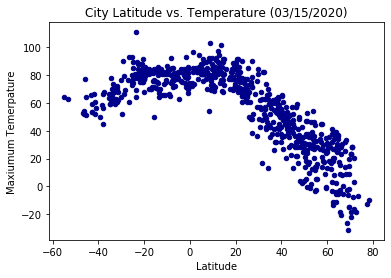

In [8]:
ax1 = df.plot.scatter(x='Lat',
                      y='Max Temp',
                      c='DarkBlue')
label_plot(ax1, 'City Latitude vs. Temperature', "Latitude", "Maxiumum Temerpature", ts )
plt.savefig('../output_data/temperature_v_latitude.png')
plt.show()


#### Latitude vs Temperature: Observation
Temperatures tend to peak at distance closer to the equator (increasing as it approaches latitude 0) then falls off by distance either to the north or south, with much cooler temperatures observed in the Northern Hemisphere ciites (of course this could be due to the fact there are more cities in the Northern Hemisphere). 

#### Latitude vs. Humidity Plot

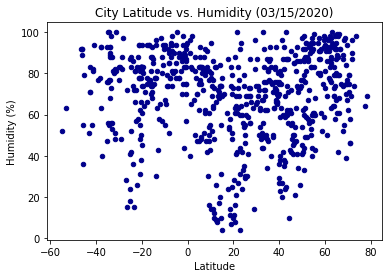

In [9]:
ax1 = df.plot.scatter(x='Lat',
                      y='Humidity',
                      c='DarkBlue')
label_plot(ax1, 'City Latitude vs. Humidity', "Latitude", "Humidity (%)", ts )
plt.savefig('../output_data/humidity_v_latitude.png')
plt.show()

#### Latitude vs Humidity: Observation
Humidity appears (for this data set) not to vary greatly by latitude, with the exceptions being north and south extremes. 

#### Latitude vs. Cloudiness Plot

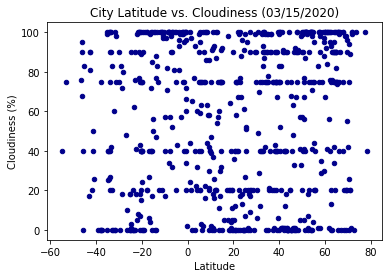

In [10]:
ax1 = df.plot.scatter(x='Lat',
                      y='Cloudiness',
                      c='DarkBlue')
label_plot(ax1, 'City Latitude vs. Cloudiness', "Latitude", "Cloudiness (%)", ts )
plt.savefig('../output_data/cloudiness_v_latitude.png')
plt.show()

#### Latitude vs Cloudiness: Observation
There appears to be no strong correlation between latitude and cloudiness. The interesting grid like structure could be because the measurements were rounded up or truncated to the nearest percentage

#### Latitude vs. Wind Speed Plot

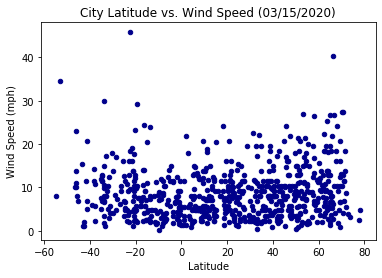

In [11]:
ax1 = df.plot.scatter(x='Lat',
                      y='Wind Speed',
                      c='DarkBlue')
label_plot(ax1, 'City Latitude vs. Wind Speed', "Latitude", "Wind Speed (mph)", ts )
plt.savefig('../output_data/windspeed_versus_latitude.png')
plt.show()

#### Latitude vs Windspeed: Observation
Again there is no real visible correlation between latitude and windspeed, althought the highest winds are in the Nothern Hemisphere - this could be due to the fact there are more cities. Interesting outlier at latitude -20 with  fast wind speed!

## Linear Regression

In [12]:
# OPTIONAL: Create a function to create Linear Regression plots

# Calculate the correlation coefficient and linear regression 
# model for mouse weight and average tumor volume for the Capomulin regimenn
# Use sci pi to the the pearson r measure of correlation (r value)

def plot_linear_regression(x_values, y_values, x_label, y_label, ts):    

    # Do a line regression on x and y values to calculate values for the line
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    
    # Longer print message - can uncomment if would prefer longer message
#     print('The correlation between ' + x_label + 
#       '\033[1m and \033[0m' +
#       'the ' + y_label +
#       '\033[1m is \033[0m' + 
#        f'\033[36m {rvalue:2.2f} \033[0m')

    fig, ax = plt.subplots()

    r_squared = rvalue * rvalue;
    
    print('  The r-value'   + '\033[1m is \033[0m' + f'\033[36m {rvalue:2.6f} \033[0m')
    print('The r-squared' + '\033[1m is \033[0m' + f'\033[36m {r_squared:2.6f} \033[0m')

    # Create a scatter plot of weight versus average tumor volume
    ax.scatter(x_values,y_values)
    
    # Add a red line to indicate the correlation
    ax.plot(x_values,regress_values,"r-")
        
    # Create labels for the axes
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title(x_label+" Versus "+ y_label + ' (' + ts.strftime('%m/%d/%Y') + ')')

    # Annotate with the line equation
    Afont = {'family': 'serif',
             'backgroundcolor': 'white',
             'color':  'red',
             'weight': 'normal',
             'size': 14,
    }
        
    line_eq = ' y= '+ str(round(slope,2)) + 'x + ' + str(round(intercept,2))
    #plt.annotate(line_eq,(min(x_values), 1.75*(max(y_values)/2)),fontsize=12,color="red")
    at = AnchoredText(line_eq,
                  frameon=True, prop=Afont,
                  loc='upper right',
                  bbox_to_anchor=(1.5, 1.),
                  bbox_transform=ax.transAxes
                  )
    at.patch.set_boxstyle("round,pad=0.,rounding_size=0.2")
    ax.add_artist(at)
    # Show the plot
    ax

In [13]:
# Create Northern and Southern Hemisphere DataFrames
northern_df = df[df['Lat'] >= 0].reset_index()    #greater than or equal to 0 degrees latitude
southern_df = df[df['Lat'] <  0].reset_index()   #less than 0 degrees latitude

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

  The r-value is  -0.889744 
The r-squared is  0.791644 


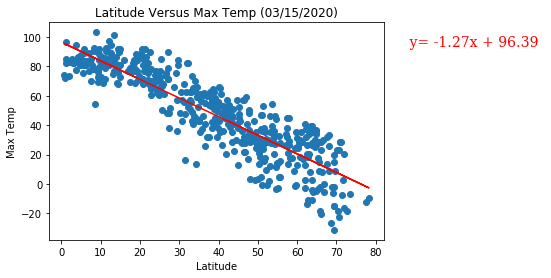

In [14]:
# Call the linear regression function
plot_linear_regression(northern_df['Lat'], northern_df['Max Temp'], "Latitude", "Max Temp", ts)
plt.savefig('../output_data/NH_temperature_v_latitude.png')


##### Northern Hemisphere - Max Temp vs. Latitude Linear Regression: Obervation
There is a strong negative correlation between max temperatures and latitude.  As we move northward away from the equator (latitude 0) maximum temperatures delcine.

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

  The r-value is  0.560980 
The r-squared is  0.314699 


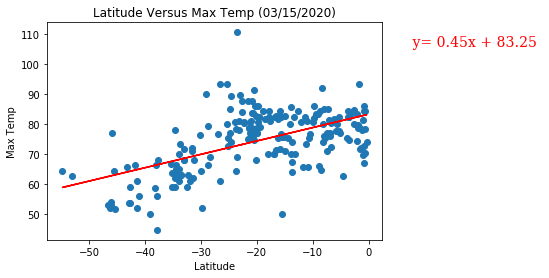

In [15]:
plot_linear_regression(southern_df['Lat'], southern_df['Max Temp'], "Latitude",  "Max Temp", ts)
plt.savefig('../output_data/SH_temperature_v_latitude.png')


##### Southern Hemisphere - Max Temp vs. Latitude Observation
There is a very weak positive correlation between max temperatures and latitude.  As we move northward toward  the equator (latitude 0) maximum temperatures do increase but the r (correlation) value is less than 1.  

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

  The r-value is  0.293155 
The r-squared is  0.085940 


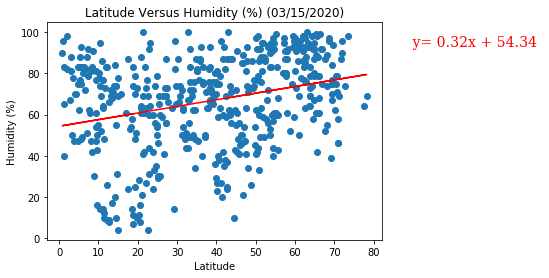

In [16]:
plot_linear_regression(northern_df['Lat'], northern_df['Humidity'], "Latitude",  "Humidity (%)", ts)
plt.savefig('../output_data/NH_humidity_v_latitude.png')

#####  Northern Hemisphere - Humidity (%) vs. Latitude Observation

There is no correlation between the percentage humidity and latitude in the northern hemisphere.

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

  The r-value is  0.194632 
The r-squared is  0.037882 


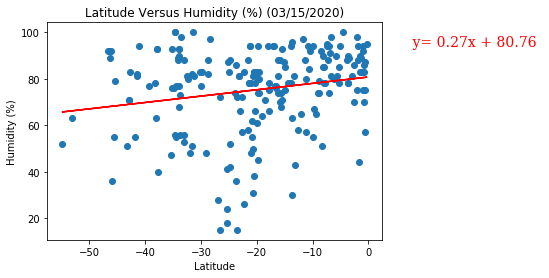

In [17]:
plot_linear_regression(southern_df['Lat'], southern_df['Humidity'], "Latitude", "Humidity (%)", ts)
plt.savefig('../output_data/SH_humidity_v_latitude.png')

#####  Southern Hemisphere - Humidity (%) vs. Latitude Observation
There is no correlation between the percentage humidity and latitude in the southern hemisphere.

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

  The r-value is  0.187153 
The r-squared is  0.035026 


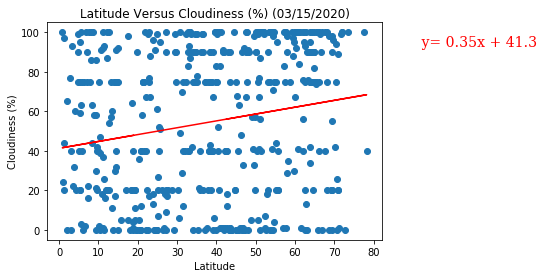

In [18]:
plot_linear_regression(northern_df['Lat'], northern_df['Cloudiness'], "Latitude", "Cloudiness (%)", ts)
plt.savefig('../output_data/NH_cloudiness_v_latitude.png')

#####  Northern Hemisphere - Cloudiness vs. Latitude Observation
There is no correlation between the percentage cloudiness and latitude in the northern hemisphere.  The grid like structure of the scatter plot indicates there might be some binning or rounding of measurements in this data set.

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

  The r-value is  0.267881 
The r-squared is  0.071760 


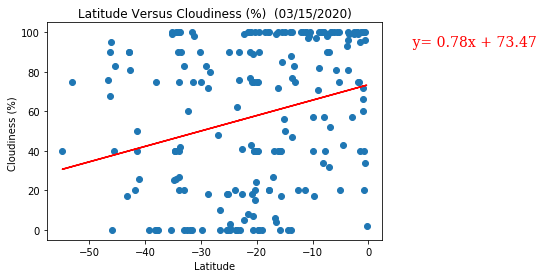

In [19]:
plot_linear_regression(southern_df['Lat'], southern_df['Cloudiness'], "Latitude", "Cloudiness (%) ", ts)
plt.savefig('../output_data/SH_cloudiness_v_latitude.png')

#####  Southern Hemisphere - Cloudiness vs. Latitude Observation
There is no correlation between the percentage humidity and latitude in the southern hemisphere, although there do seem to be a higher density of clouds closer to the equator, and very sparse cloud over as we move south from the equator. 

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

  The r-value is  0.197807 
The r-squared is  0.039127 


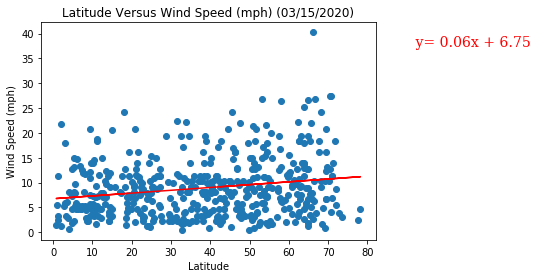

In [20]:
plot_linear_regression(northern_df['Lat'], northern_df['Wind Speed'], "Latitude" , "Wind Speed (mph)", ts)
plt.savefig('../output_data/NH_windspeed_v_latitude.png')

#####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Observation
There is no correlation between the wind speed and latitude in the northern hemisphere.  Winds speeds are mostly below 25-30 mph. 

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

  The r-value is  -0.244673 
The r-squared is  0.059865 


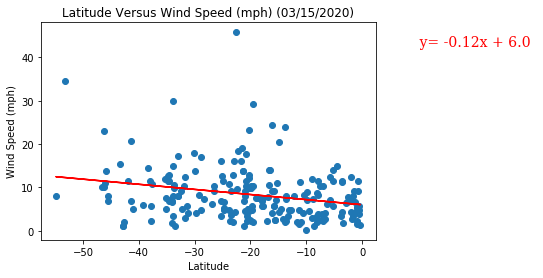

In [21]:
plot_linear_regression( southern_df['Lat'], southern_df['Wind Speed'], "Latitude", "Wind Speed (mph)", ts)
plt.savefig('../output_data/SH_windspeed_v_latitude.png')

#####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Observation
There is no correlation between the wind speed  and latitude in the southern hemisphere.  In general for this dataset most wind speeds are below 25 mph. 

# End of Notebook 